In [1]:
%load_ext watermark
%watermark

Last updated: 2023-06-14T15:33:15.867397-05:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd

matplotlib matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que requiere el cerrar cada plot para poder continuar.

Alternativamente, se puede usar %matplotlib inline, que es más sencilla ya que simplemente muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

En este apartado vamos a revisar el dataset. El objetivo sera tener un dataset lo mas parecido al original pero sin fallos en el mismo que puedan llevarnos a sacar conclusiones erroneas.

El input de este paso es el output del anterior

In [4]:
df_consumo_sustancias = pd.read_csv("Data/df_consumo.1.procesado_inicial.csv")

In [5]:
df_consumo_sustancias.shape

(10149, 57)

In [6]:
df_consumo_sustancias.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,servicio_energia,estrato,...,g_11_j_consumio_alguna_vez_heroina,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,1,5.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2619,2,27,1,1,Tolima,ESPINAL,1,1,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicados

En este apartado se intentan ver dos cosas:

* Asegurarse de que datos que no debieran estar duplicados no lo están (por ejemplo, numeros de telefono)

* Revisar  si hay columnas que tengan un alto numero de duplicados, ya que pueden no aportar mucha informacion

Recordemos que las entidades posibles eran:   
    
- Departamento-municipio
- tipo_vivienda-servicio_energia
- tipo_vivienda-estrato
- tipo_vivienda-residentes_hogar

In [7]:
df_consumo_sustancias['tipo_vivienda_unico'] = df_consumo_sustancias.tipo_vivienda.astype(str).str.cat([df_consumo_sustancias.servicio_energia.apply(str), df_consumo_sustancias.estrato.apply(str)],sep='-')

In [8]:
df_consumo_sustancias.tipo_vivienda_unico.value_counts()

1-1-2.0    2029
1-1-1.0    1908
2-1-2.0    1661
1-1-3.0    1284
2-1-3.0    1213
2-1-1.0     908
2-1-4.0     329
1-1-4.0     220
2-1-5.0     121
3-1-2.0     104
2-1-6.0      93
3-1-3.0      76
3-1-1.0      71
1-1-5.0      50
1-2-nan      16
1-1-6.0      16
3-1-4.0      12
4-1-1.0       8
1-1-8.0       8
1-1-9.0       7
2-1-9.0       5
2-2-nan       3
4-2-nan       2
4-1-2.0       2
2-1-8.0       1
3-2-nan       1
3-1-5.0       1
Name: tipo_vivienda_unico, dtype: int64

Nos damos cuenta de que hay muchos repetidos, veamos un ejemplo

In [9]:
df_consumo_sustancias[df_consumo_sustancias.tipo_vivienda_unico=='1-1-1.0'].head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,servicio_energia,estrato,...,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m,tipo_vivienda_unico
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-1.0
9,2238,2,55,2,1,Guaviare,SAN JOSÉ DEL GUAVIARE,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-1.0
10,13988,2,38,2,2,Choco,QUIBDÓ,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-1.0
21,35657,1,17,2,1,Cauca,POPAYÁN,1,1,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1-1-1.0
36,12836,2,50,3,2,Antioquia,PUERTO BERRÍO,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-1.0


Como se puede observar cada tipo de vivienda tiene diferentes valores a las columnas tenidas en cuenta 

Por lo tanto, solo vamos a considerar duplicados aquellos records que sean idénticos en todas sus columnas

In [10]:
df_consumo_sustancias[df_consumo_sustancias.duplicated()].shape

(0, 58)

De este modo se puede observar que no existen valores o filas duplicadas en el dataset que se esta analizando , sin embargo si existen valores nulos que se deben corregir

In [11]:
df_consumo_sustancias.shape

(10149, 58)

Borramos la columna `tipo_vivienda_unico`

In [12]:
del df_consumo_sustancias['tipo_vivienda_unico']

Ahora falta ver si hay variables en las que haya una gran cantidad de records que tengan el mismo valor (cardinalidad).

In [13]:
n_records = len(df_consumo_sustancias)
n_records

10149

In [14]:
n_records = len(df_consumo_sustancias)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(df_consumo_sustancias)

directorio | 0.0-0.0 | int64
per_sexo | 0.504-0.496 | int64
per_edad | 0.031-0.008 | int64
vive_padre_hogar | 0.571-0.149 | int64
vive_madre_hogar | 0.535-0.166 | int64
departamento | 0.141-0.003 | object
municipio | 0.103-0.0 | object
tipo_vivienda | 0.546-0.001 | int64
servicio_energia | 0.998-0.002 | int64
estrato | 0.374-0.001 | float64
residentes_hogar | 0.244-0.0 | int64
d_01_aporta_dinero_hogar | 0.694-0.306 | int64
d_02_situacion_actual | 0.595-0.008 | int64
d_08_estado_salud | 0.6-0.01 | int64
d_09_deprimido | 0.74-0.003 | int64
d_10_poco_interes | 0.795-0.004 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.824-0.018 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.944-0.002 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.946-0.002 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.677-0.323 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.603-0.397 | int64
d2_01_etnia | 0.824-0.001 | int64
d2_03_estado_civil | 0

Vemos que los campos `per_sexo, vive_padre_hogar, vive_madre_hogar, tipo_vivienda, servicio_energia, d_01_aporta_dinero_hogar, d_08_estado_salud, d_09_deprimido, d_10_poco_interes, d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente, d_11_k_conocimiento_riesgo_cocaina_frecuentemente, d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente, d_12_b_presenta_problemas_consumo_sp_barrio, d_12_c_presenta_problemas_expendio_sp_barrio, d2_01_etnia, g_01_a_num_familiares_consumen_sp, g_03_curiosidad_probar_sp, g_05_posibilidad_probar_sp, g_06_a_posibilidad_conseguir_marihuana, g_06_b_posibilidad_conseguir_cocaina, g_06_c_posibilidad_conseguir_basuco, g_06_j_posibilidad_conseguir_heroina, g_07_alguien_ofrecio_comprar_probar_sp, g_11_f_consumio_alguna_vez_marihuana, g_11_g_consumio_alguna_vez_cocaina, g_11_h_consumio_alguna_vez_basuco, g_11_j_consumio_alguna_vez_heroina` pueden tener un problema de valores repetidos, en realidad 30% no es algo muy dramatico, seria distinto si el valor mas comun tuviera un > 65%.

In [15]:
df_consumo_sustancias.g_03_curiosidad_probar_sp.value_counts(normalize=True)

2    0.575722
1    0.424278
Name: g_03_curiosidad_probar_sp, dtype: float64

In [16]:
df_consumo_sustancias.g_03_curiosidad_probar_sp.value_counts(normalize=True)

2    0.575722
1    0.424278
Name: g_03_curiosidad_probar_sp, dtype: float64

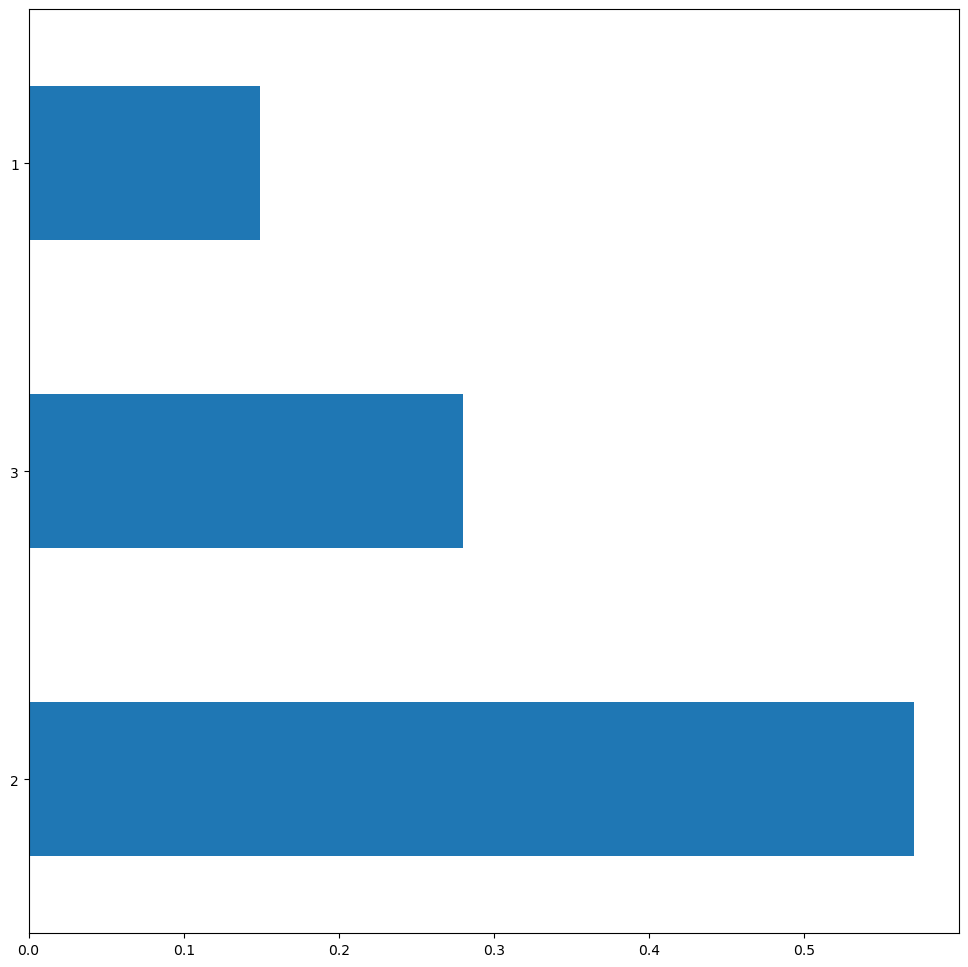

In [17]:
df_consumo_sustancias.vive_padre_hogar.value_counts(normalize=True).plot.barh();

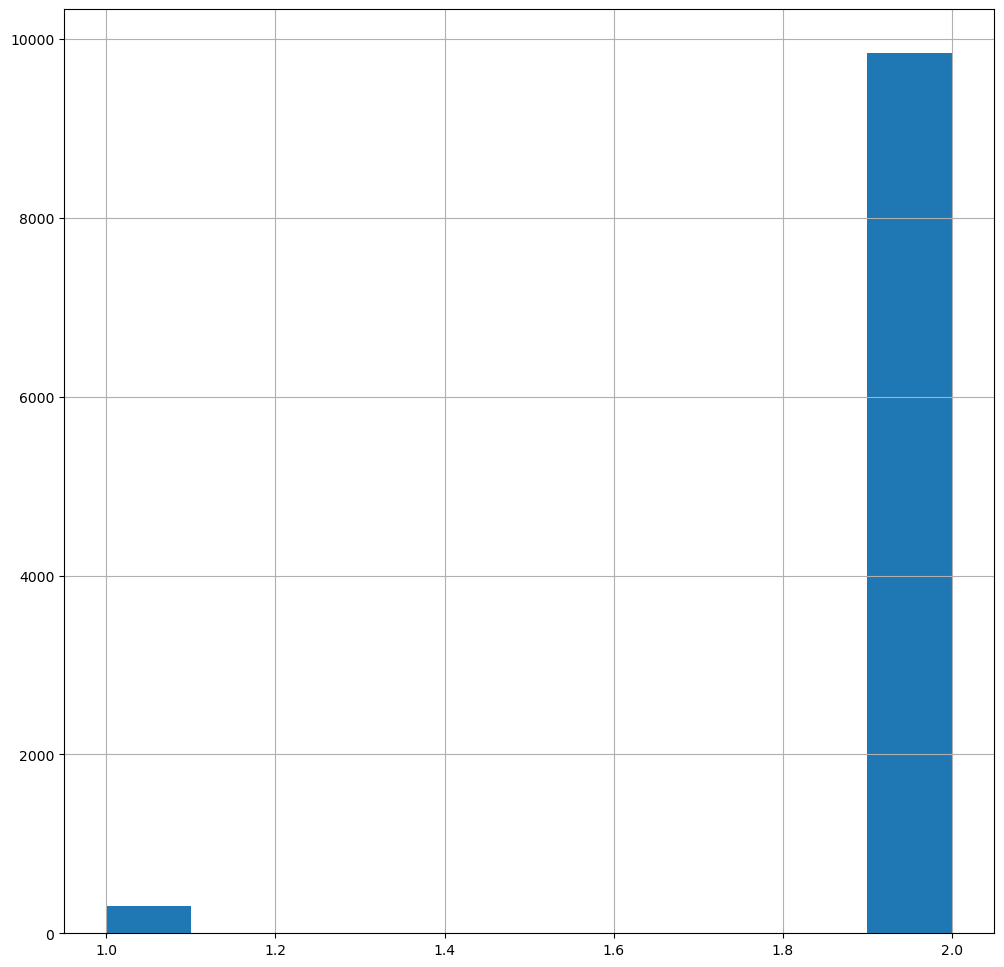

In [18]:
df_consumo_sustancias.g_11_h_consumio_alguna_vez_basuco.hist();

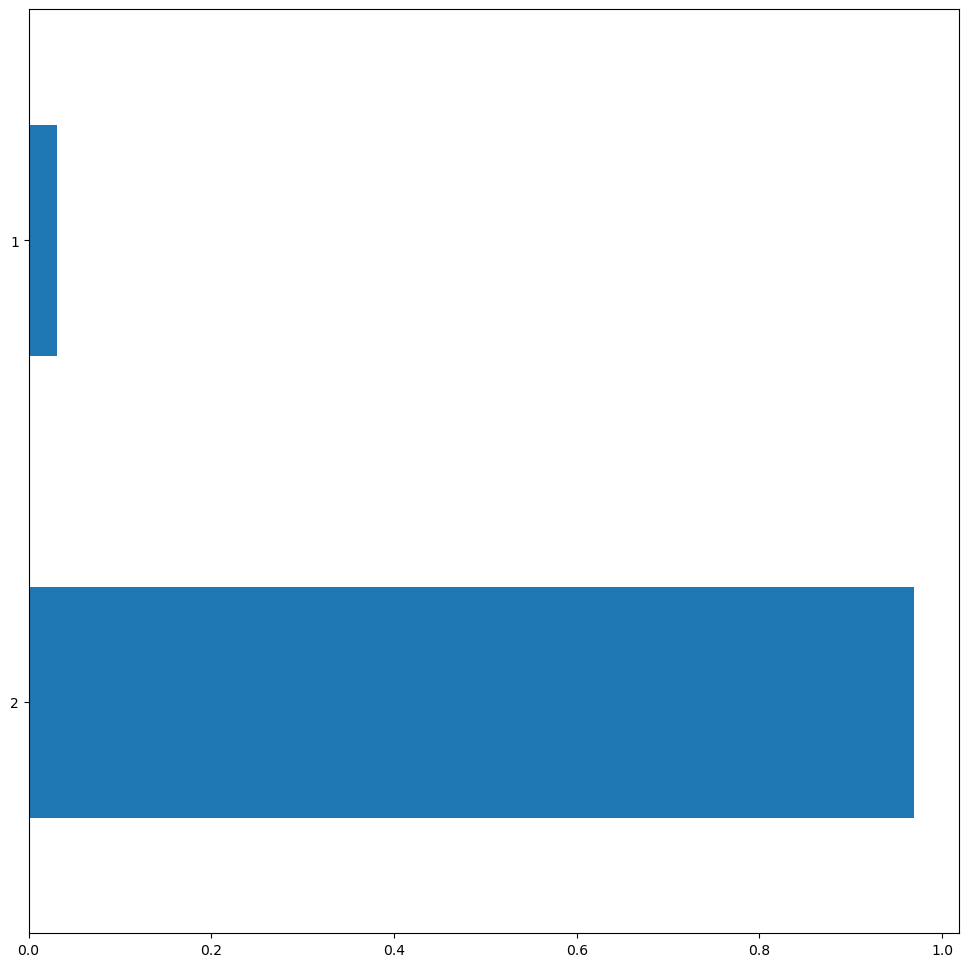

In [19]:
df_consumo_sustancias.g_11_h_consumio_alguna_vez_basuco.value_counts(normalize=True).plot.barh();

### Valores inexistentes
son valores que son nulos pero que no son validos

In [20]:
n_records = len(df_consumo_sustancias)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df_consumo_sustancias)

directorio | 0.0 | int64
per_sexo | 0.0 | int64
per_edad | 0.0 | int64
vive_padre_hogar | 0.0 | int64
vive_madre_hogar | 0.0 | int64
departamento | 0.0 | object
municipio | 0.0 | object
tipo_vivienda | 0.0 | int64
servicio_energia | 0.0 | int64
estrato | 0.0021677012513548134 | float64
residentes_hogar | 0.0 | int64
d_01_aporta_dinero_hogar | 0.0 | int64
d_02_situacion_actual | 0.0 | int64
d_08_estado_salud | 0.0 | int64
d_09_deprimido | 0.0 | int64
d_10_poco_interes | 0.0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.0 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.0 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.0 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.0 | int64
d2_01_etnia | 0.0 | int64
d2_03_estado_civil | 0.0 | int64
d2_04_num_hijos | 0.0 | int64
d2_05_nivel_educativo | 0.0 | int64
g_01_familiares_consumen_sp | 0.0 | int64
g_01_a_num_familiares_consu

Vemos que los campos `estrato (con un porcentaje muy bajo), d_03_actividad_economica_empresa_negocio, d_04_cargo, g_01_a_num_familiares_consumen_sp, g_02_a_num_amigos_consumen_sp, g_08_a_ofrecieron_marihuana, g_08_b_ofrecieron_cocaina, g_08_c_ofrecieron_basuco, g_08_e_ofrecieron_heroina, g_11_f_anios_consumio_marihuana, g_11_g_anios_consumio_cocaina, g_11_h_anios_consumio_basuco, g_11_j_anios_consumio_heroina, k_03_consumio_marihuana_12m, k_04_frecuencia_consumo_marihuana_12m, l_02_consumio_cocaina_12m, l_03_frecuencia_consumo_cocaina_12m, m_02_consumio_basuco_12m, m_03_frecuencia_consumo_basuco_12m, 0_02_consumio_heroina_12m, 0_03_frecuencia_consumo_heroina_12m` tienen valores inexistentes. Estas tienen cantidades a considerar ya que muchas variables tienen relacion con otras. Por ejemplo, la g_07 con las derivaciones de g_08. Si en g_07 se responde que no, se generarán campos nulos en las g_08 debido a esto. 


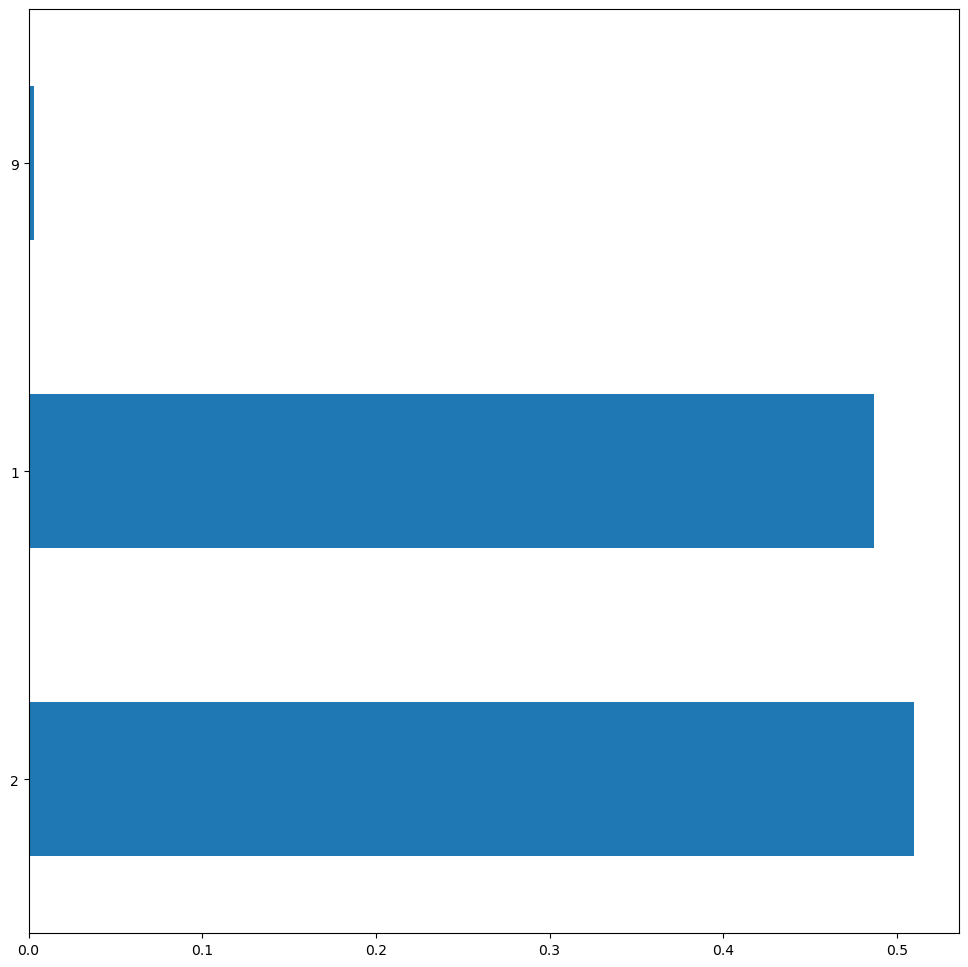

In [21]:
df_consumo_sustancias.g_07_alguien_ofrecio_comprar_probar_sp.value_counts(normalize=True).plot.barh();

### Valores extremos (outliers)

Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

El z score se define como:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [22]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df_consumo_sustancias)

directorio | 0 | int64
per_sexo | 0 | int64
per_edad | 0 | int64
vive_padre_hogar | 0 | int64
vive_madre_hogar | 0 | int64
tipo_vivienda | 12 | int64
servicio_energia | 22 | int64
estrato | 0 | float64
residentes_hogar | 122 | int64
d_01_aporta_dinero_hogar | 0 | int64
d_02_situacion_actual | 315 | int64
d_08_estado_salud | 101 | int64
d_09_deprimido | 29 | int64
d_10_poco_interes | 37 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 179 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 571 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 544 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0 | int64
d2_01_etnia | 595 | int64
d2_03_estado_civil | 0 | int64
d2_04_num_hijos | 161 | int64
d2_05_nivel_educativo | 0 | int64
g_01_familiares_consumen_sp | 0 | int64
g_01_a_num_familiares_consumen_sp | 0 | float64
g_02_amigos_consumen_sp | 0 | int64
g_02_a_num_amigos_consumen_sp | 0 | float6

C:\Users\jefer\AppData\Local\Temp\ipykernel_3436\766313308.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


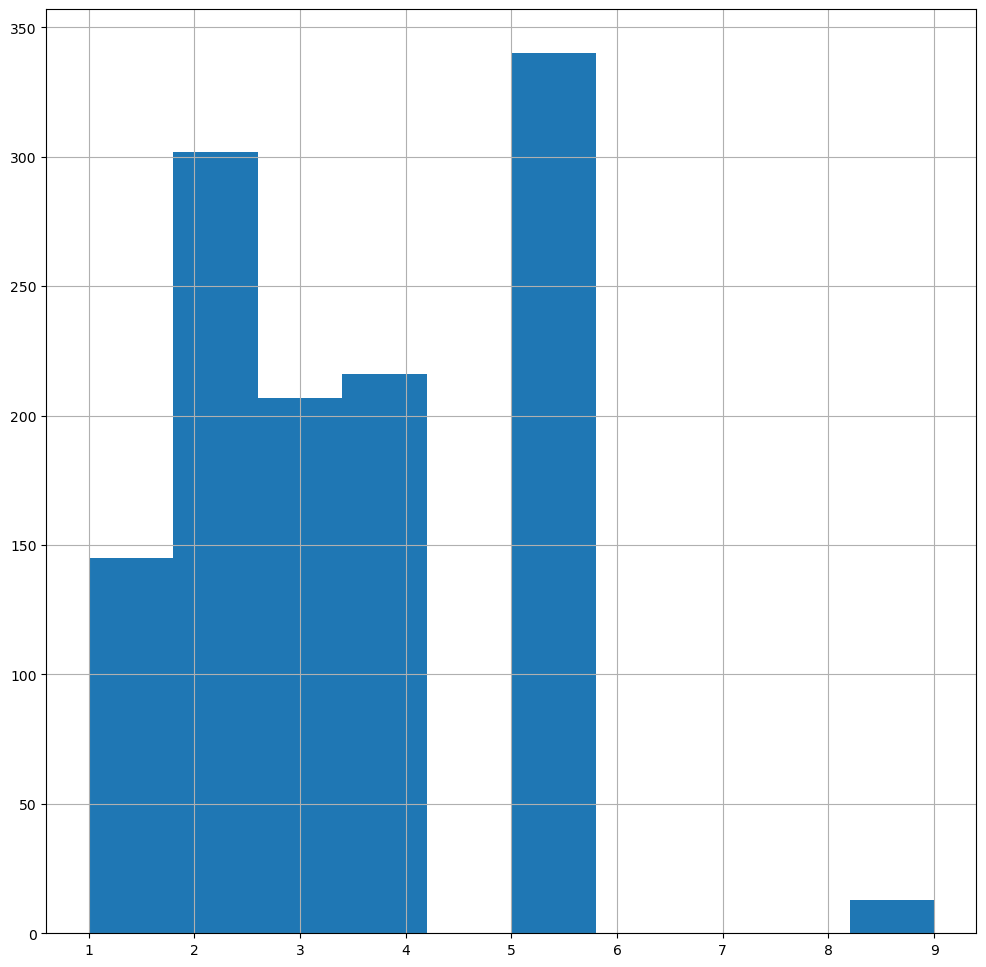

In [23]:
df_consumo_sustancias.k_04_frecuencia_consumo_marihuana_12m.hist();

Vemos que las variables de vive_padre_hogar, vive_madre_hogar, tipo_vivienda tienen outliers. Podemos hacer un boxplot para visualizar esto mejor, 

## Outliers que no son válidos

Estas variables no aportan calidad al pronóstico de factores de riesgo.

- d_09_deprimido 29 no ayuda al modelo con la respuesta 9 -> no contesta.
- d_10_poco_interes 37 no ayuda al modelo con la respuesta 9 -> no contesta.
- g_07_alguien_ofrecio_comprar_probar_sp no ayuda al modelo con la respuesta 9 -> no contesta.
- d_02_situacion_actual se pueden mejorar estos valores categorizando
- g_11_f_consumio_alguna_vez_marihuana 1 -> si consume, esta respuesta es valida.
- g_11_g_consumio_alguna_vez_cocaina 1 -> si consume, esta respuesta es valida.
- g_11_h_consumio_alguna_vez_basuco 1 -> si consume, esta respuesta es valida.
- g_11_j_consumio_alguna_vez_heroina 1 -> si consume, esta respuesta es valida.
- los g se pueden categorizar para eliminar los ouliers


## Outliers que si son validos

- tipo vivienda tiene 12 valores que es vivienda_indigena por lo que si es válida.
- servicio_energia 22 digeron que no tenian dicho servicio por lo que si es válida.
- residentes_hogar 122 el cual los valores son validos si se exceden de 7 individuos.
- estado_salud 101 el cual es valido seleccionar 1 muy malo.
- d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente, d_11_k_conocimiento_riesgo_cocaina_frecuentemente, d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente si son validos.
- d2_01_etnia 595 si es valido considerar otros tipos de etnia.
- d2_04_num_hijos cantidad de hijos.


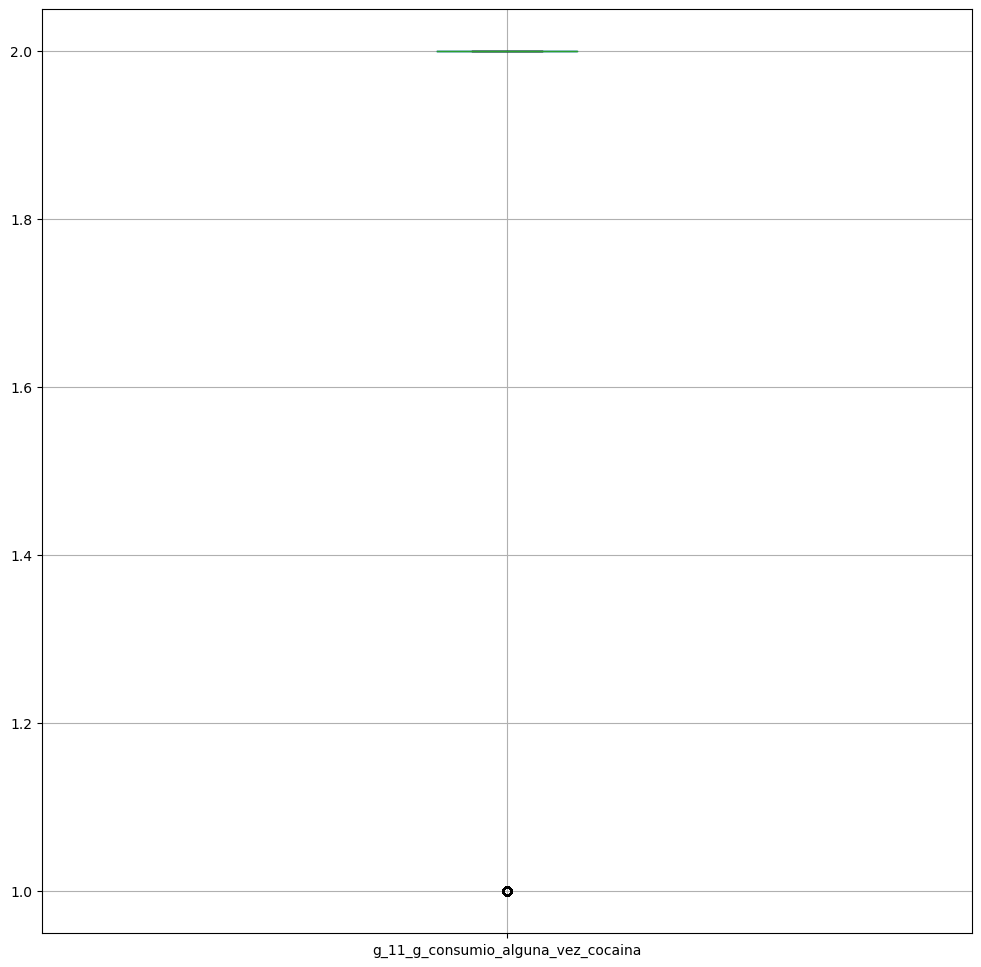

In [24]:
df_consumo_sustancias.boxplot(column='g_11_g_consumio_alguna_vez_cocaina');

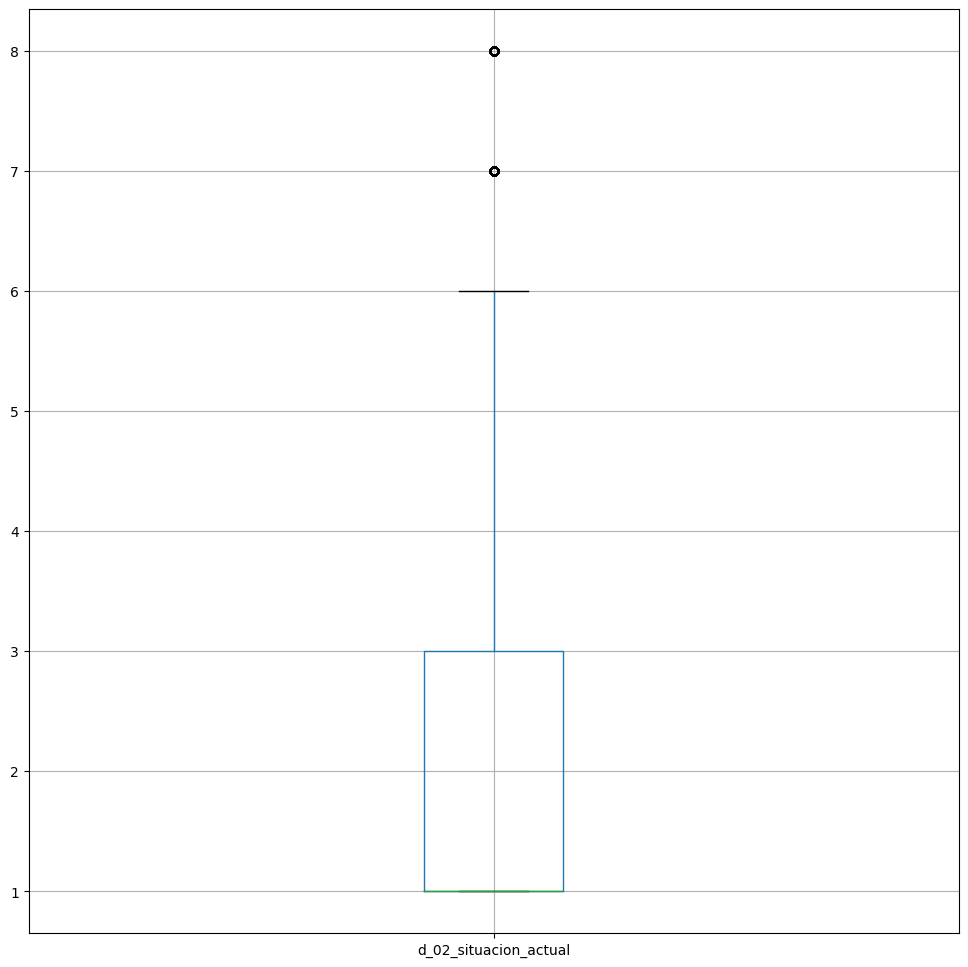

In [25]:
df_consumo_sustancias.boxplot(column='d_02_situacion_actual');

In [26]:
df_consumo_sustancias[df_consumo_sustancias.vive_padre_hogar==9].shape

(0, 57)

## Eliminación de registros

Vemos que en este dataset hay varios datos inconsistentes. Dado que el objetivo es el pronostico de factores de riesgo, convendria remover al menos aquellas respuestas que no aporten en el pronostico

- d_09_deprimido 29 no ayuda al modelo con la respuesta 9 -> no contesta.
d_10_poco_interes 37 no ayuda al modelo con la respuesta 9 -> no contesta.
g_07_alguien_ofrecio_comprar_probar_sp no ayuda al modelo con la respuesta 9 -> no contesta.

In [27]:
df_consumo_sustancias_limpio = df_consumo_sustancias[df_consumo_sustancias.d_09_deprimido!=9]

In [28]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.d_10_poco_interes!=9]

In [29]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.g_07_alguien_ofrecio_comprar_probar_sp!=9]

# Validación de datos 

- Estrato = 9 no sabe no responde
- Estrato, Nivel educativo, k_03_consumio_marihuana_12m, k_04_frecuencia_consumo_marihuana_12m, l_02_consumio_cocaina_12m, l_03_frecuencia_consumo_cocaina_12m, m_03_consumio_basuco_12m, m_04_frecuencia_consumo_basuco_12m, o_02_consumio_heroina_12m, o_03_frecuencia_consumo_heroina_12m

In [30]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.estrato!=9]

In [31]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio.dropna(subset=['estrato'])

In [32]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.estrato!=8]

In [33]:
del df_consumo_sustancias_limpio['servicio_energia']

In [34]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.d2_05_nivel_educativo!=9]

In [35]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.k_03_consumio_marihuana_12m!=9]

In [36]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.k_04_frecuencia_consumo_marihuana_12m!=9]

In [37]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.l_02_consumio_cocaina_12m!=9]

In [38]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.l_03_frecuencia_consumo_cocaina_12m!=9]

In [39]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.m_02_consumio_basuco_12m!=9]

In [40]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.m_03_frecuencia_consumo_basuco_12m!=9]

In [41]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.o_02_consumio_heroina_12m!=9]

In [42]:
df_consumo_sustancias_limpio = df_consumo_sustancias_limpio[df_consumo_sustancias_limpio.o_03_frecuencia_consumo_heroina_12m!=9]

# Validación de eliminación de datos

In [43]:
df_consumo_sustancias_limpio.estrato.unique()

array([2., 1., 5., 3., 6., 4.])

In [44]:
df_consumo_sustancias_limpio.d_09_deprimido.unique()

array([1, 2], dtype=int64)

Ya que hemos descubierto esto, volvamos a revisar los datos con el nuevo dataset

In [45]:
outliers_col(df_consumo_sustancias_limpio)

directorio | 0 | int64
per_sexo | 0 | int64
per_edad | 0 | int64
vive_padre_hogar | 0 | int64
vive_madre_hogar | 0 | int64
tipo_vivienda | 10 | int64
estrato | 108 | float64
residentes_hogar | 118 | int64
d_01_aporta_dinero_hogar | 0 | int64
d_02_situacion_actual | 310 | int64
d_08_estado_salud | 100 | int64
d_09_deprimido | 0 | int64
d_10_poco_interes | 0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 174 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 558 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 534 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0 | int64
d2_01_etnia | 576 | int64
d2_03_estado_civil | 0 | int64
d2_04_num_hijos | 156 | int64
d2_05_nivel_educativo | 0 | int64
g_01_familiares_consumen_sp | 0 | int64
g_01_a_num_familiares_consumen_sp | 0 | float64
g_02_amigos_consumen_sp | 0 | int64
g_02_a_num_amigos_consumen_sp | 0 | float64
g_03_curiosidad_probar_sp | 

C:\Users\jefer\AppData\Local\Temp\ipykernel_3436\766313308.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


In [46]:
df_consumo_sustancias_limpio.shape

(10000, 56)

In [47]:
valores_duplicados_col(df_consumo_sustancias_limpio)

directorio | 0.0-0.0 | int64
per_sexo | 0.496-0.49 | int64
per_edad | 0.03-0.008 | int64
vive_padre_hogar | 0.562-0.147 | int64
vive_madre_hogar | 0.526-0.164 | int64
departamento | 0.139-0.003 | object
municipio | 0.102-0.0 | object
tipo_vivienda | 0.537-0.001 | int64
estrato | 0.37-0.011 | float64
residentes_hogar | 0.241-0.0 | int64
d_01_aporta_dinero_hogar | 0.684-0.301 | int64
d_02_situacion_actual | 0.587-0.008 | int64
d_08_estado_salud | 0.591-0.01 | int64
d_09_deprimido | 0.732-0.253 | int64
d_10_poco_interes | 0.787-0.198 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.813-0.017 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.93-0.002 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.933-0.002 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.666-0.319 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.596-0.39 | int64
d2_01_etnia | 0.812-0.001 | int64
d2_03_estado_civil | 0.411-0.023 | int64
d2_04_num_hijos | 0.38

### Valores inexistentes

In [48]:
valores_inexistentes_col(df_consumo_sustancias_limpio)

directorio | 0.0 | int64
per_sexo | 0.0 | int64
per_edad | 0.0 | int64
vive_padre_hogar | 0.0 | int64
vive_madre_hogar | 0.0 | int64
departamento | 0.0 | object
municipio | 0.0 | object
tipo_vivienda | 0.0 | int64
estrato | 0.0 | float64
residentes_hogar | 0.0 | int64
d_01_aporta_dinero_hogar | 0.0 | int64
d_02_situacion_actual | 0.0 | int64
d_08_estado_salud | 0.0 | int64
d_09_deprimido | 0.0 | int64
d_10_poco_interes | 0.0 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 0.0 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 0.0 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 0.0 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 0.0 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 0.0 | int64
d2_01_etnia | 0.0 | int64
d2_03_estado_civil | 0.0 | int64
d2_04_num_hijos | 0.0 | int64
d2_05_nivel_educativo | 0.0 | int64
g_01_familiares_consumen_sp | 0.0 | int64
g_01_a_num_familiares_consumen_sp | 0.7146516898216573 | float64
g_02_amigos

Ahora vemos que hay valores inexistentes extremos en varias variable. La variable con mayor numero de valores inexistentes es o_03_frecuencia_consumo_heroina_12m (98%).

In [49]:
df_consumo_sustancias_limpio.shape

(10000, 56)

In [50]:
df_consumo_sustancias_limpio.d_02_situacion_actual.unique()

array([1, 2, 7, 3, 4, 5, 8, 6], dtype=int64)

<Axes: >

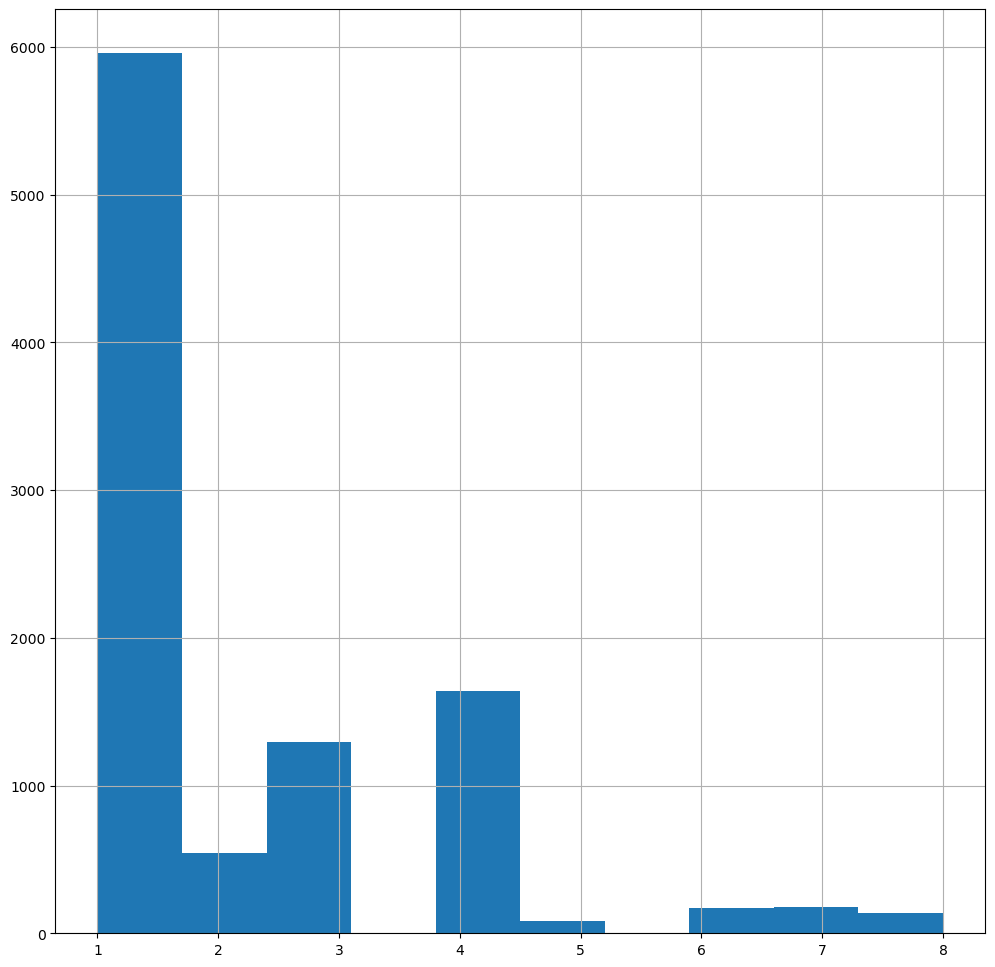

In [51]:
df_consumo_sustancias_limpio.d_02_situacion_actual.hist()

### Conclusion
- No Hay registros duplicados por tupla, pero si ha variables con registros que se duplican, a continuación
- las variables `estrato (con un porcentaje muy bajo), d_03_actividad_economica_empresa_negocio, d_04_cargo, g_01_a_num_familiares_consumen_sp, g_02_a_num_amigos_consumen_sp, g_08_a_ofrecieron_marihuana, g_08_b_ofrecieron_cocaina, g_08_c_ofrecieron_basuco, g_08_e_ofrecieron_heroina, g_11_f_anios_consumio_marihuana, g_11_g_anios_consumio_cocaina, g_11_h_anios_consumio_basuco, g_11_j_anios_consumio_heroina` tienen valores inexistentes.
- La variable `servicio_energia, d_01_aporta_dinero_hogar, d_02_situacion_actual (58%), d_08_estado_salud(59%), d_09_deprimido, d_10_poco_interes, d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente, d_11_k_conocimiento_riesgo_cocaina_frecuentemente, d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente, d_12_b_presenta_problemas_consumo_sp_barrio (%63), d_12_c_presenta_problemas_expendio_sp_barrio (59%), d2_01_etnia, g_01_familiares_consumen_sp, g_02_amigos_consumen_sp (56%), g_03_curiosidad_probar_sp (57%), g_04_probaria_sp, g_05_posibilidad_probar_sp (50%), g_06_a_posibilidad_conseguir_marihuana(60%), g_06_j_posibilidad_conseguir_heroina (55%), g_07_alguien_ofrecio_comprar_probar_sp (50%), g_11_f_consumio_alguna_vez_marihuana, g_11_g_consumio_alguna_vez_cocaina, g_11_h_consumio_alguna_vez_basuco, g_11_h_consumio_alguna_vez_basuco ` tienen una clase dominante > 65%.
- hay un outlier en las variables `d_09_deprimido, d_10_poco_interes` y `g_07_alguien_ofrecio_comprar_probar_sp`.
- hay datos inconsistentes en las variables `Estrato, Nivel educativo, k_03_consumio_marihuana_12m, k_04_frecuencia_consumo_marihuana_12m, l_02_consumio_cocaina_12m, l_03_frecuencia_consumo_cocaina_12m, m_02_consumio_basuco_12m, m_03_frecuencia_consumo_basuco_12m, o_02_consumio_heroina_12m, o_03_frecuencia_consumo_heroina_12m` se han removido estos ya que no contribuyen con la predicción de factores de riesgo.
- la columna servicioenergia se removio debido a que cuenta con 2 datos y la clase dominate es del 99 por lo que no aporta.

### Exportamos

In [53]:
df_consumo_sustancias_limpio.to_csv("Data/df_consumo_sustancias.2.limpio_analisis.csv", index=False)